<h1>ASSIGNMENT: SALARY PREDICTION</h1>

<h2>ALABADO, RODERICK L.</h2>
<h3>BSIT-3A</h3>

# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h3>1. How many unique job titles are there?</h3>

In [3]:

unique_jobs = df['job_title'].nunique()
print(f"Number of unique job titles: {unique_jobs}")


df['job_title'].unique()



Number of unique job titles: 93


array(['Applied Scientist', 'Data Quality Analyst',
       'Compliance Data Analyst', 'Machine Learning Engineer',
       'Research Scientist', 'Data Engineer', 'Data Analyst',
       'Data Scientist', 'BI Data Engineer', 'Research Engineer',
       'Business Data Analyst', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Scientist', 'AI Programmer',
       'AI Developer', 'Computer Vision Engineer', 'BI Developer',
       'Big Data Engineer', 'Deep Learning Engineer', 'Head of Data',
       'Analytics Engineer', 'Data Architect', 'Director of Data Science',
       'Head of Data Science', 'Data Analytics Manager', 'ML Engineer',
       'Applied Machine Learning Engineer', 'Applied Data Scientist',
       'ETL Engineer', 'Data Specialist', 'Lead Data Analyst',
       'Data Manager', 'Machine Learning Scientist', 'MLOps Engineer',
       'Financial Data Analyst', 'Software Data Engineer',
       'Data Science Manager', 'Data Science Consultant',
       'Machine Learning 

<h1>Answer 1: There are 93 unique job titles </h1>

<h3>2. What is the average salary (salary_in_usd) per work_year?</h2>

In [4]:

avg_salary_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

print(avg_salary_year)


   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413


<h3>Answer 2: From 2020 to 2023, the average salary in USD showed a consistent upward trend. In 2020, the average salary was approximately USD 92,303. It increased to USD 94,087 in 2021, then rose significantly to USD 133,380 in 2022. By 2023, the average salary reached USD 148,955, marking the highest point in the four-year span. </h3>

<h2>3. Create a bar plot showing average salary by experience_level.</h2>

  experience_level  salary_in_usd
0               EN   78546.284375
1               EX  194930.929825
2               MI  104544.864030
3               SE  153062.468626


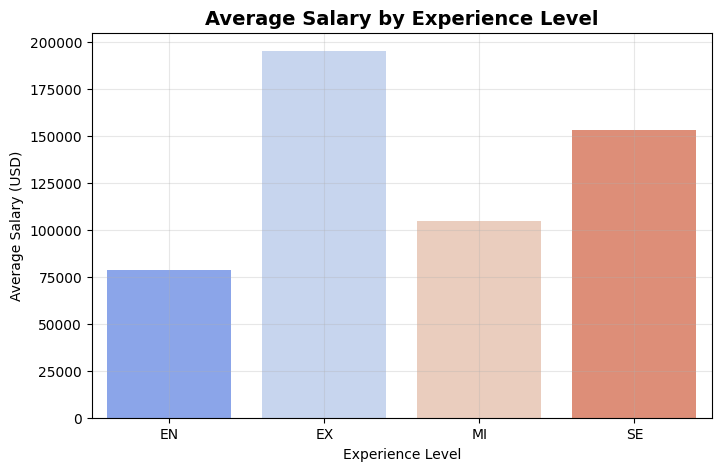

In [5]:

avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

print(avg_salary_exp)


plt.figure(figsize=(8,5))
sns.barplot(data=avg_salary_exp, x='experience_level', y='salary_in_usd', palette='coolwarm')
plt.title('Average Salary by Experience Level', fontsize=14, fontweight='bold')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(alpha=0.3)
plt.show()


<h2> Answer 3: Based on experience level, the average salary in USD increases with seniority. Entry-level professionals (EN) earn approximately USD 78,546, while mid-level (MI) employees average around USD 104,545. Senior-level (SE) professionals earn about USD 153,062, and executives (EX) command the highest average salary at approximately USD 194,931.</h2>

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [13]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


In [10]:

#Step1 Select features:
features = ['work_year', 'experience_level', 'job_title']


target = 'salary_in_usd'

#Step2 Encode categorical variables
le_exp = LabelEncoder()
df['experience_level_encoded'] = le_exp.fit_transform(df['experience_level'])


le_job = LabelEncoder()
df['job_title_encoded'] = le_job.fit_transform(df['job_title'])

#Step3 Define X (features) and y
X = df[['work_year', 'experience_level_encoded', 'job_title_encoded']]
y = df['salary_in_usd']


print("Feature set (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Feature set (X):
   work_year  experience_level_encoded  job_title_encoded
0       2023                         0                  8
1       2023                         0                  8
2       2023                         0                 41
3       2023                         0                 22
4       2023                         0                  8

Target (y):
0    213660
1    130760
2    100000
3     30000
4    204620
Name: salary_in_usd, dtype: int64


## 📈 Part 4: Train a Linear Regression Model

In [7]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.17
RMSE: 58477.29


In [12]:
# --- Encode categorical variables ---
le_exp = LabelEncoder()
df['experience_level_encoded'] = le_exp.fit_transform(df['experience_level'])

le_job = LabelEncoder()
df['job_title_encoded'] = le_job.fit_transform(df['job_title'])

# --- Define features (X) and target (y) ---
X = df[['work_year', 'experience_level_encoded', 'job_title_encoded']]
y = df['salary_in_usd']

# --- Split data into train and test sets (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Create and train the model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Make predictions ---
y_pred = model.predict(X_test)

# --- Evaluate ---
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R² Score: 0.17
RMSE: 58477.29


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [14]:
# --- Check how experience levels were encoded ---
print("Experience level encoding:", dict(zip(le_exp.classes_, le_exp.transform(le_exp.classes_))))


Experience level encoding: {'EN': np.int64(0), 'EX': np.int64(1), 'MI': np.int64(2), 'SE': np.int64(3)}


In [15]:
# --- Create a small DataFrame for 2024 with all experience levels ---
# Adjust the encoded values based on the print result above
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3],  # EN, MI, SE, EX (adjust if needed)
    'job_title_encoded': [0, 0, 0, 0]  # Placeholder, assuming same job title for comparison
})

# --- Predict salaries for 2024 ---
predicted_salaries = model.predict(future_data)

# --- Display results ---
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

results


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,97906.262416
1,Mid,117820.324260
2,Senior,137734.386104
3,Executive,157648.447947


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h2>1. Does your model make reasonable predictions? Why or why not?</h2>  
The model gives somewhat reasonable predictions since salaries generally increase with experience and over time, but they may not fully reflect real-world salary trends due to limited input features.

<h2>2. What are the limitations of using only work_year and experience_level?</h2>  
Using only these two variables ignores other key factors such as job title, company size, industry, country, and employment type—all of which significantly influence salary levels.

<h2>3. How could you improve this model?</h2>  
I could improve the model by adding more features (like company location, job title, or remote ratio), using one-hot encoding for categorical variables, and trying more advanced models like Random Forest or Gradient Boosting to capture non-linear relationships.

<h2>4. Why is R² not enough to trust your predictions?</h2>  
R² only measures how much variance is explained by the model—it doesn’t ensure accuracy or generalizability. A model can have a high R² but still make poor predictions on new data, especially when the real salary trends are non-linear.


## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀